In [5]:
# ============================================================
# 1. IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# ============================================================
# 2. VISUAL SETTINGS
# ============================================================
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# ============================================================
# 3. LOAD DATASET
# ============================================================
file_path = r"C:\Users\Rehman khan k\OneDrive\Desktop\offerbeez excel file\merged_output.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("ERROR: File not found.")
except Exception as e:
    print("ERROR while loading:", e)

# ============================================================
# 4. PIN CODE CLEANING — (Correct, Strict & Error-Free)
# ============================================================
def clean_pin(pin):
    if pd.isna(pin):
        return pd.NA

    pin = str(pin).replace(".0", "").strip()

    invalid = ["nan", "none", "", " ", "-", "--", "---", "n/a", "null", "not available", "not found"]
    if pin.lower() in invalid:
        return pd.NA

    pin = ''.join([c for c in pin if c.isdigit()])

    if len(pin) != 6:
        return pd.NA

    return int(pin)

# ---- RUN CLEANING ----
if "PIN CODE" in df.columns:
    df["PIN CODE"] = df["PIN CODE"].apply(clean_pin).astype("Int64")
    print("PIN CODE cleaning completed.")

    # ---- CONVERT TO STRING ----
    df["PIN CODE"] = df["PIN CODE"].astype("string")
    print("PIN CODE converted to string.")

else:
    print("'PIN CODE' column missing in dataset.")


# ============================================================
# 5. BASIC OUTPUT
# ============================================================
print("\n==================== BASIC INFO ====================")
print("Shape:", df.shape)

print("\nColumn Names:")
print(df.columns.tolist())

print("\nPreview:")
display(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isna().sum())


Dataset loaded successfully!
PIN CODE cleaning completed.
PIN CODE converted to string.

==================== BASIC INFO ====================
Shape: (47745, 7)

Column Names:
['BUSINESS NAME', 'SECTOR', 'CATEGORY', 'ADDRESS', 'ZONE', 'PIN CODE', 'RATING']

Preview:


,BUSINESS NAME,SECTOR,CATEGORY,ADDRESS,ZONE,PIN CODE,RATING
0,City Food Centre,Retail,Grocery,"20, 3rd Cross Rd, Murugeshpalya, S R Layout, B...",East,560017,4.2
1,"Menorah Bridals - Bridal Boutique, Couture & A...",Retail,Fashion,"226, 7th Main Rd, HBCS, Amarjyoti Layout, Doml...",East,560008,4.9
2,Vatsala Ladies Boutique,Retail,Fashion,"Skylark Residency 101, opposite Airforce Schoo...",East,560017,4.4
3,"Saree Pre-Pleating, Folding and Draping servic...",Retail,Fashion,"403/19,Ground Floor 2nd cross, 2nd Cross Rd, n...",East,560017,4.8
4,Ramdev fashion - school uniform airforce schoo...,Retail,Fashion,"Shop no.01, S L N complex, No 66, Church St, M...",East,560017,4.5



Data Types:
BUSINESS NAME            object
SECTOR                   object
CATEGORY                 object
ADDRESS                  object
ZONE                     object
PIN CODE         string[python]
RATING                  float64
dtype: object

Missing Values:
BUSINESS NAME       0
SECTOR              0
CATEGORY            0
ADDRESS             0
ZONE                0
PIN CODE           54
RATING           8562
dtype: int64


In [44]:
# Basic info & null counts
display(df.info())
print("\nNull counts per column:\n", df.isna().sum())

# Clean column names
df.columns = [c.strip() for c in df.columns]

# Convert text-based columns to string
for c in ["BUSINESS NAME","SECTOR","CATEGORY","ADDRESS","ZONE"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()

# --- FIX HERE ---
# Convert PIN CODE safely: string → numeric → integer
if "PIN CODE" in df.columns:
    df['PIN CODE'] = (
        df['PIN CODE']
        .astype(str)               # remove trailing spaces
        .str.replace(".0", "", regex=False)
        .str.strip()
    )
    
    # Convert to Int64 (allows NaN)
    df['PIN CODE'] = pd.to_numeric(df['PIN CODE'], errors='coerce').astype('Int64')
# -----------------

# Convert RATING to numeric
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

# Show description of RATING
display(df['RATING'].describe())

# Show top rows
display(df[['BUSINESS NAME','SECTOR','CATEGORY','ZONE','PIN CODE','RATING']].head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47745 entries, 0 to 47744
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BUSINESS NAME  47745 non-null  object 
 1   SECTOR         47745 non-null  object 
 2   CATEGORY       47745 non-null  object 
 3   ADDRESS        47745 non-null  object 
 4   ZONE           47745 non-null  object 
 5   PIN CODE       47691 non-null  string 
 6   RATING         39183 non-null  float64
dtypes: float64(1), object(5), string(1)
memory usage: 2.5+ MB


None


Null counts per column:
 BUSINESS NAME       0
SECTOR              0
CATEGORY            0
ADDRESS             0
ZONE                0
PIN CODE           54
RATING           8562
dtype: int64


count    39183.000000
mean         4.325539
std          0.743460
min          1.000000
25%          4.000000
50%          4.500000
75%          4.900000
max          5.000000
Name: RATING, dtype: float64

,BUSINESS NAME,SECTOR,CATEGORY,ZONE,PIN CODE,RATING
0,City Food Centre,Retail,Grocery,East,560017,4.2
1,"Menorah Bridals - Bridal Boutique, Couture & A...",Retail,Fashion,East,560008,4.9
2,Vatsala Ladies Boutique,Retail,Fashion,East,560017,4.4
3,"Saree Pre-Pleating, Folding and Draping servic...",Retail,Fashion,East,560017,4.8
4,Ramdev fashion - school uniform airforce schoo...,Retail,Fashion,East,560017,4.5
5,Santosh,Retail,Fashion,East,560017,4.8
6,TRENDY TREASURE,Retail,Fashion,East,560037,5.0
7,New Gents Camp,Retail,Fashion,East,560017,4.6
8,Fiber 2 Fashion,Retail,Fashion,East,560017,3.9
9,BeadznThreadz,Retail,Fashion,East,560017,4.9


In [6]:
import pandas as pd
import numpy as np

# ----------------------------------------------------
# Load raw CSV
# ----------------------------------------------------
file_path = r"C:\Users\Rehman khan k\OneDrive\Desktop\offerbeez excel file\merged_output.csv"
df = pd.read_csv(file_path)

# ----------------------------------------------------
# 3.1 Fix typo in column names
# ----------------------------------------------------
if "CATERGORY" in df.columns:
    df.rename(columns={"CATERGORY": "CATEGORY"}, inplace=True)

# ----------------------------------------------------
# PIN CODE CLEANING (full validation)
# ----------------------------------------------------
def clean_pin(pin):
    """Clean and standardize Indian PIN codes."""
    
    if pd.isna(pin):
        return pd.NA

    # Convert to string & remove float artifacts like '.0'
    pin = str(pin).replace(".0", "").strip()

    # Invalid values
    invalid = ["nan", "none", "", " ", "-", "--", "---", "n/a", "null", "not available", "not found"]
    if pin.lower() in invalid:
        return pd.NA

    # Keep only digits
    pin = ''.join([c for c in pin if c.isdigit()])

    # Must be exactly 6 digits to be a valid Indian PIN
    if len(pin) != 6:
        return pd.NA

    return pin  # return as string

# Apply cleaning
if "PIN CODE" in df.columns:
    df["PIN CODE"] = df["PIN CODE"].apply(clean_pin).astype("string")
    print("PIN CODE cleaned and converted to pandas string dtype.")
else:
    print("'PIN CODE' column missing in dataset.")

# ----------------------------------------------------
# 3.3 Address cleanup
# ----------------------------------------------------
df['ADDRESS'] = df['ADDRESS'].astype(str).str.replace(r'\n', ' ', regex=True).str.strip()

# ----------------------------------------------------
# 3.4 Rating cleanup
# ----------------------------------------------------
df['RATING_missing'] = df['RATING'].isna()
df['RATING_filled_mean'] = df['RATING'].fillna(df['RATING'].mean())

# ----------------------------------------------------
# 3.5 Remove duplicate rows
# ----------------------------------------------------
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Dropped {before-after} duplicate rows")

# ----------------------------------------------------
# 3.6 Normalize case for categorical columns
# ----------------------------------------------------
df['SECTOR'] = df['SECTOR'].astype(str).str.title()
df['CATEGORY'] = df['CATEGORY'].astype(str).str.title()
df['ZONE'] = df['ZONE'].astype(str).str.title()

# ----------------------------------------------------
# 3.7 Quick PIN sample check
# ----------------------------------------------------
pin_sample = df['PIN CODE'].unique()[:20]
print("Sample PIN codes:", pin_sample)

# ----------------------------------------------------
# Save cleaned file
# ----------------------------------------------------
cleaned_path = r"C:\Users\Rehman khan k\OneDrive\Desktop\offerbeez excel file\merged_output20.csv"
df.to_csv(cleaned_path, index=False)

print(f"Cleaned data saved to {cleaned_path}")
df.info()


PIN CODE cleaned and converted to pandas string dtype.
Dropped 15811 duplicate rows
Sample PIN codes: <StringArray>
['560017', '560008', '560037', '560045', '560071', '562114', '560001',
 '560095', '560034', '855108', '560070', '560103', '560066', '560087',
 '560003', '560035', '560032', '560048', '560076', '560067']
Length: 20, dtype: string
Cleaned data saved to C:\Users\Rehman khan k\OneDrive\Desktop\offerbeez excel file\merged_output20.csv
<class 'pandas.core.frame.DataFrame'>
Index: 31934 entries, 0 to 47744
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BUSINESS NAME       31934 non-null  object 
 1   SECTOR              31934 non-null  object 
 2   CATEGORY            31934 non-null  object 
 3   ADDRESS             31934 non-null  object 
 4   ZONE                31934 non-null  object 
 5   PIN CODE            31892 non-null  string 
 6   RATING              26265 non-null  float64
 7   RAT

In [46]:
# Basic info
display(df.info())
display(df.describe(include='all').T)

# Null counts
print("Null counts:\n", df.isna().sum())

# Ensure RATING numeric
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

# Quick distribution of categorical keys
for col in ['SECTOR','CATEGORY','ZONE','PIN CODE']:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False).head(10))


<class 'pandas.core.frame.DataFrame'>
Index: 31934 entries, 0 to 47744
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BUSINESS NAME       31934 non-null  object 
 1   SECTOR              31934 non-null  object 
 2   CATEGORY            31934 non-null  object 
 3   ADDRESS             31934 non-null  object 
 4   ZONE                31934 non-null  object 
 5   PIN CODE            31892 non-null  string 
 6   RATING              26265 non-null  float64
 7   RATING_missing      31934 non-null  bool   
 8   RATING_filled_mean  31934 non-null  float64
dtypes: bool(1), float64(2), object(5), string(1)
memory usage: 2.2+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BUSINESS NAME,31934,26450,Axis Bank ATM,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SECTOR,31934,5,Food & Beverages,8876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CATEGORY,31934,21,Restaurant,3347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,31934,28382,"Kammagondahalli, Jalahalli, Bengaluru, Karnata...",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZONE,31934,4,North,10297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PIN CODE,31892,210,560064,1681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RATING,26265.0,NaN,NaN,NaN,4.333033,0.747059,1.0,4.0,4.5,4.9,5.0
RATING_missing,31934,2,False,26265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RATING_filled_mean,31934.0,NaN,NaN,NaN,4.331702,0.677516,1.0,4.1,4.325539,4.8,5.0


Null counts:
 BUSINESS NAME            0
SECTOR                   0
CATEGORY                 0
ADDRESS                  0
ZONE                     0
PIN CODE                42
RATING                5669
RATING_missing           0
RATING_filled_mean       0
dtype: int64

--- SECTOR ---
SECTOR
Food & Beverages     8876
Retail               8082
Medical & Health     5241
Others               5089
Personal Services    4646
Name: count, dtype: int64

--- CATEGORY ---
CATEGORY
Restaurant     3347
Bakery         3006
Pharmacy       2743
Cafe           2523
Fashion        2456
Educational    2409
Gym            2047
Salon          2020
Clinic         1977
Electronics    1836
Name: count, dtype: int64

--- ZONE ---
ZONE
North    10297
South     8149
West      7060
East      6428
Name: count, dtype: int64

--- PIN CODE ---
PIN CODE
560064    1681
560091    1531
560073    1182
560058    1139
560037     876
560066     853
560043     811
560083     759
560068     758
560076     749
Name: count, dty

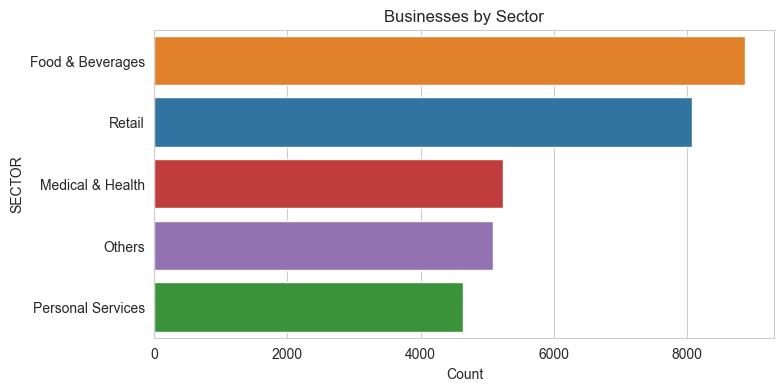

In [47]:
import plotly.express as px

# Sector counts - seaborn
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='SECTOR', hue='SECTOR', order=df['SECTOR'].value_counts().index, palette="tab10", legend=False)
plt.title("Businesses by Sector")
plt.xlabel("Count")
plt.show()

# Category top 25 - plotly interactive (optional)
top25 = df['CATEGORY'].value_counts().head(25)
fig = px.bar(x=top25.values, y=top25.index, orientation='h', title="Top 25 Categories")
fig.update_layout(height=700)
fig.show()


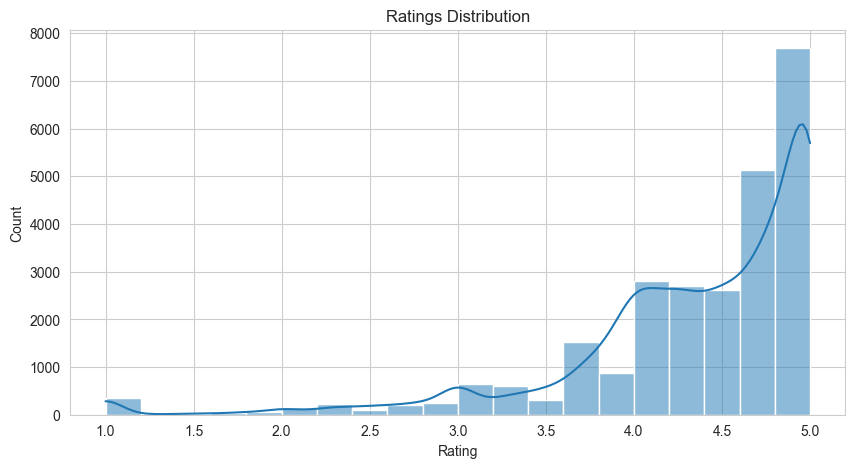

In [48]:
# Overall histogram
plt.figure()
sns.histplot(df['RATING'].dropna(), kde=True, bins=20)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.show()




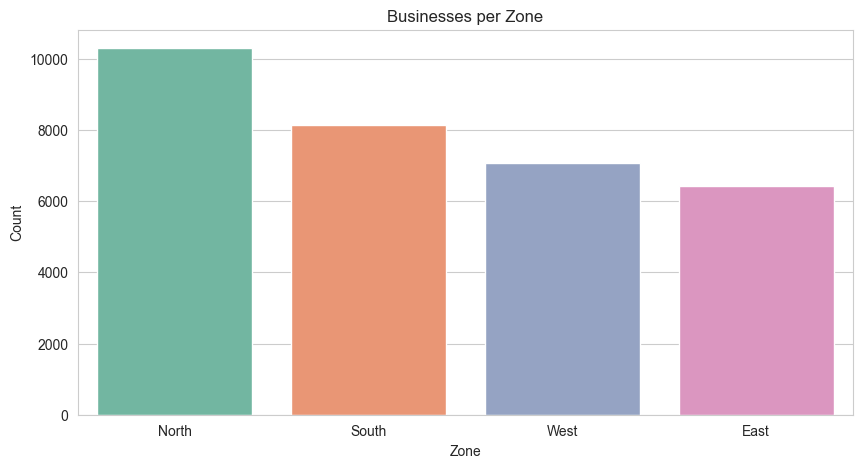

In [49]:
# Businesses per zone (bar)
zone_counts = df['ZONE'].value_counts()
plt.figure()
sns.barplot(x=zone_counts.index, y=zone_counts.values, hue=zone_counts.index, palette='Set2', legend=False)
plt.title("Businesses per Zone")
plt.xlabel("Zone")
plt.ylabel("Count")
plt.show()


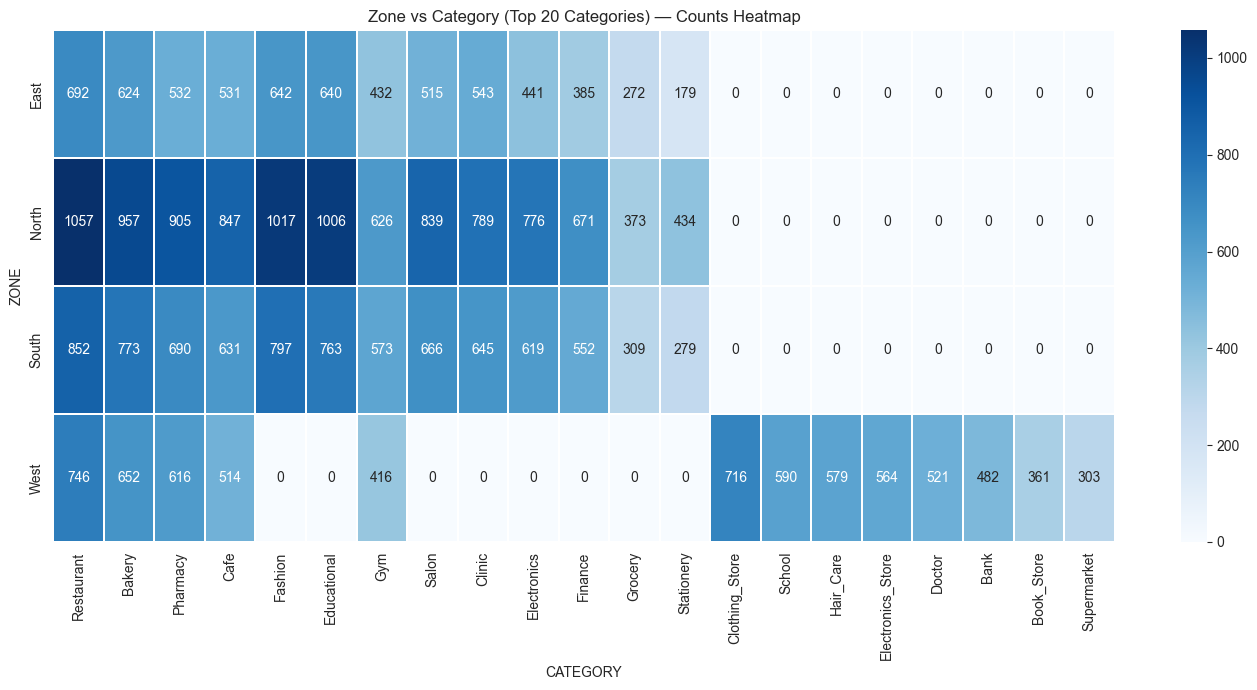

In [50]:
top20_cats = df['CATEGORY'].value_counts().head(25).index
heat = pd.crosstab(df['ZONE'], df['CATEGORY'])[top20_cats]

plt.figure(figsize=(14,7))
sns.heatmap(
    heat, 
    cmap='Blues', 
    linewidths=0.3, 
    annot=True,        # SHOW VALUES
    fmt='d'            # FORMAT AS INTEGER
)
plt.title("Zone vs Category (Top 20 Categories) — Counts Heatmap")
plt.tight_layout()
plt.show()


CATEGORY,Restaurant,Bakery,Pharmacy,Cafe,Fashion,Educational,Gym,Salon,Clinic,Electronics,Finance,Grocery,Stationery,Clothing_Store,School
ZONE,,,,,,,,,,,,,,,
East,692,624,532,531,642,640,432,515,543,441,385,272,179,0,0
North,1057,957,905,847,1017,1006,626,839,789,776,671,373,434,0,0
South,852,773,690,631,797,763,573,666,645,619,552,309,279,0,0
West,746,652,616,514,0,0,416,0,0,0,0,0,0,716,590


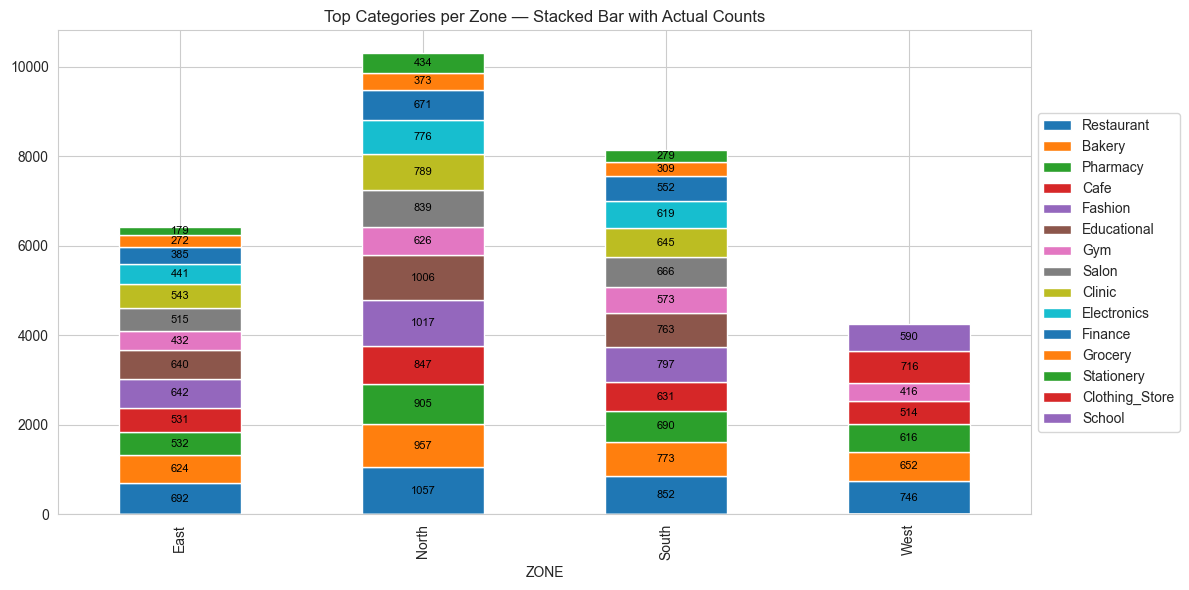

In [51]:
# 5.1 Category share per Zone (pivot table)
pivot_zone_cat = pd.crosstab(df['ZONE'], df['CATEGORY'])

# Show top categories columns only (top 15 categories)
top15_cat = df['CATEGORY'].value_counts().head(15).index.tolist()
display(pivot_zone_cat[top15_cat])

# 5.2 Stacked bar: actual counts of top categories across zones
counts = pivot_zone_cat[top15_cat]

ax = counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("Top Categories per Zone — Stacked Bar with Actual Counts")

# ---- ADD ACTUAL NUMBER LABELS ON STACKS ----
for i, zone in enumerate(counts.index):
    cumulative = 0
    for cat in top15_cat:
        value = counts.loc[zone, cat]
        if value > 0:
            ax.text(
                i,                                # x-position
                cumulative + (value / 2),         # y-position (middle of bar segment)
                str(value),                       # actual number
                ha='center', va='center',
                fontsize=8, color='black'
            )
        cumulative += value

plt.tight_layout()
plt.show()


Total rows: 31934
Unique business names: 26450


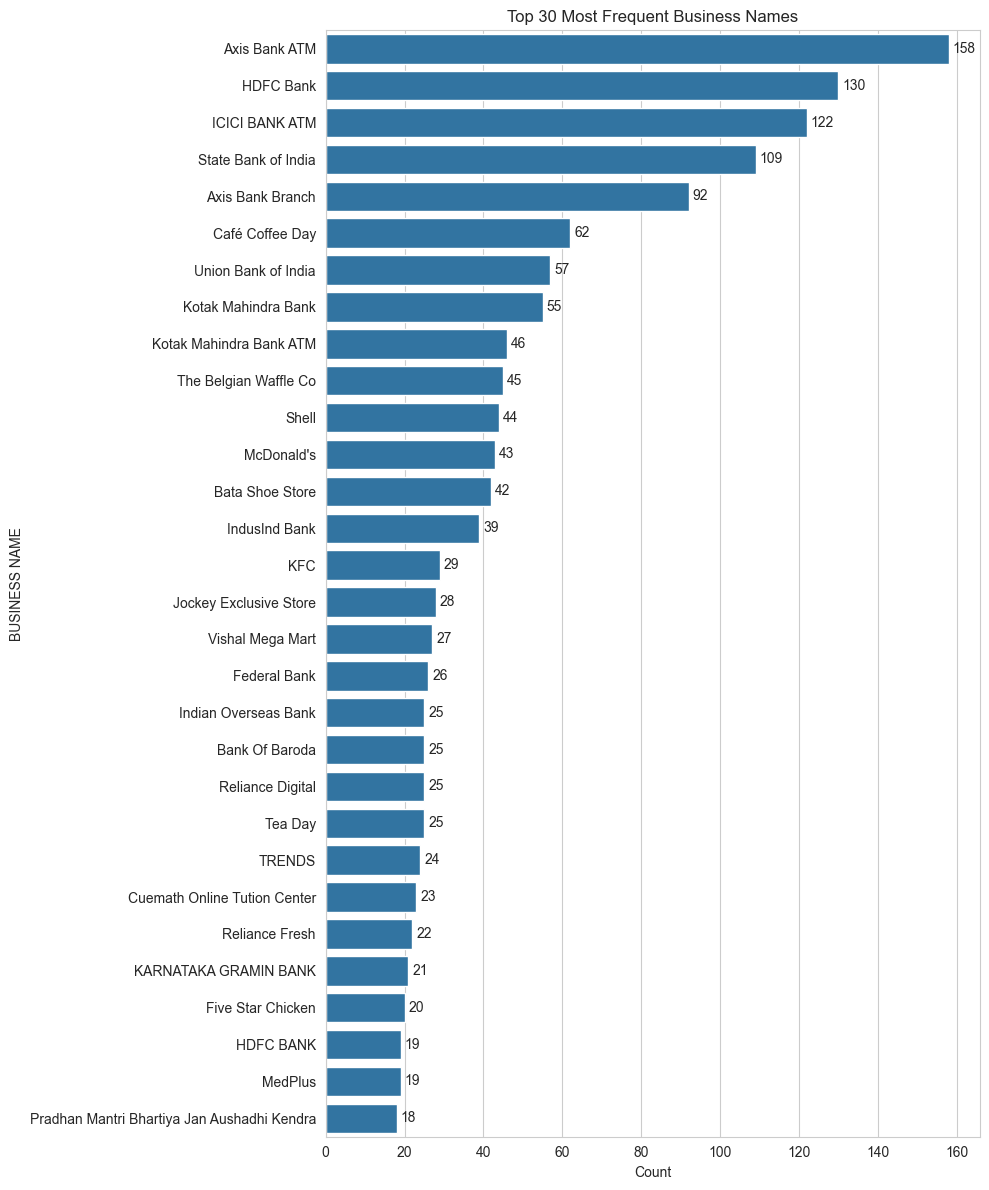

In [52]:
# Unique and counts
print("Total rows:", len(df))
print("Unique business names:", df['BUSINESS NAME'].nunique())

# Top 30 frequent business names
top_names = df['BUSINESS NAME'].value_counts().head(30)

plt.figure(figsize=(10, 12))
ax = sns.barplot(x=top_names.values, y=top_names.index)

plt.title("Top 30 Most Frequent Business Names")
plt.xlabel("Count")

# ---- ADD VALUE LABELS ----
for i, v in enumerate(top_names.values):
    ax.text(v + 1, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [53]:
# Cell 3 - Quick summaries (and save CSV summaries)
# Sector, Category, Zone, PIN code frequency counts
sector_counts = df['SECTOR'].value_counts()
category_counts = df['CATEGORY'].value_counts()
zone_counts = df['ZONE'].value_counts()
pin_counts = df['PIN CODE'].dropna().astype(int).value_counts()
import os

# Define output directory
OUT_DIR_BASE = "output"        # <-- you can change folder name
os.makedirs(OUT_DIR_BASE, exist_ok=True)

# Save CSV summaries
sector_counts.to_csv(os.path.join(OUT_DIR_BASE, "sector_counts.csv"), header=['count'])
category_counts.to_csv(os.path.join(OUT_DIR_BASE, "category_counts.csv"), header=['count'])
zone_counts.to_csv(os.path.join(OUT_DIR_BASE, "zone_counts.csv"), header=['count'])
pin_counts.to_csv(os.path.join(OUT_DIR_BASE, "pin_counts.csv"), header=['count'])
print("CSV files saved successfully in:", OUT_DIR_BASE)

CSV files saved successfully in: output


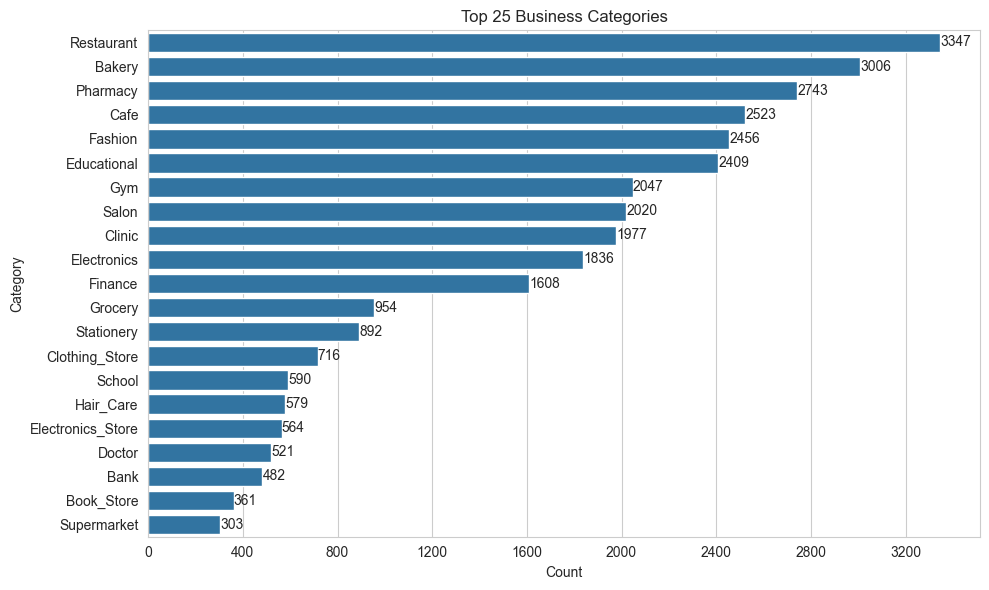

In [54]:
from matplotlib import ticker

# Get top 25 categories WITH counts
top_categories = df['CATEGORY'].value_counts().head(25)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_categories.values, y=top_categories.index)

# Labels & title
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Top 25 Business Categories')

# Ensure integer ticks
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Add value labels
for i, v in enumerate(top_categories.values):
    ax.text(v + 1, i, str(v), va='center')

plt.tight_layout()
plt.show()


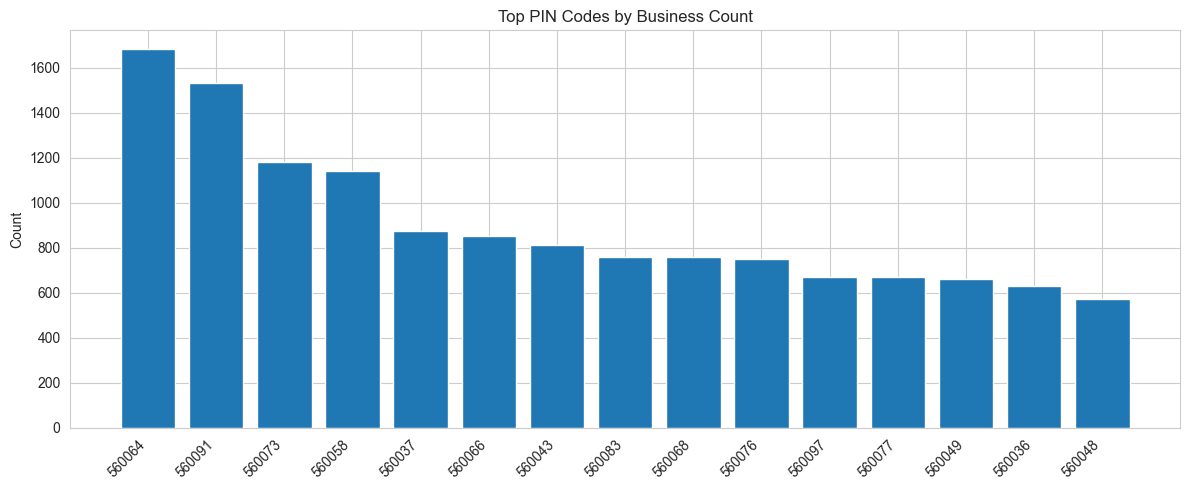

In [55]:
# Cell 8 - Figure: Top PIN codes by business count
import os

VIZ_DIR = "visualizations"
os.makedirs(VIZ_DIR, exist_ok=True)

top_pins = pin_counts.head(15)
plt.figure(figsize=(12,5))
x = np.arange(len(top_pins))
plt.bar(x, top_pins.values)
plt.xticks(x, top_pins.index.astype(str), rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Top PIN Codes by Business Count')
plt.tight_layout()
plt.savefig(os.path.join(VIZ_DIR, "top_pincodes_real.png"), dpi=200)
plt.show()


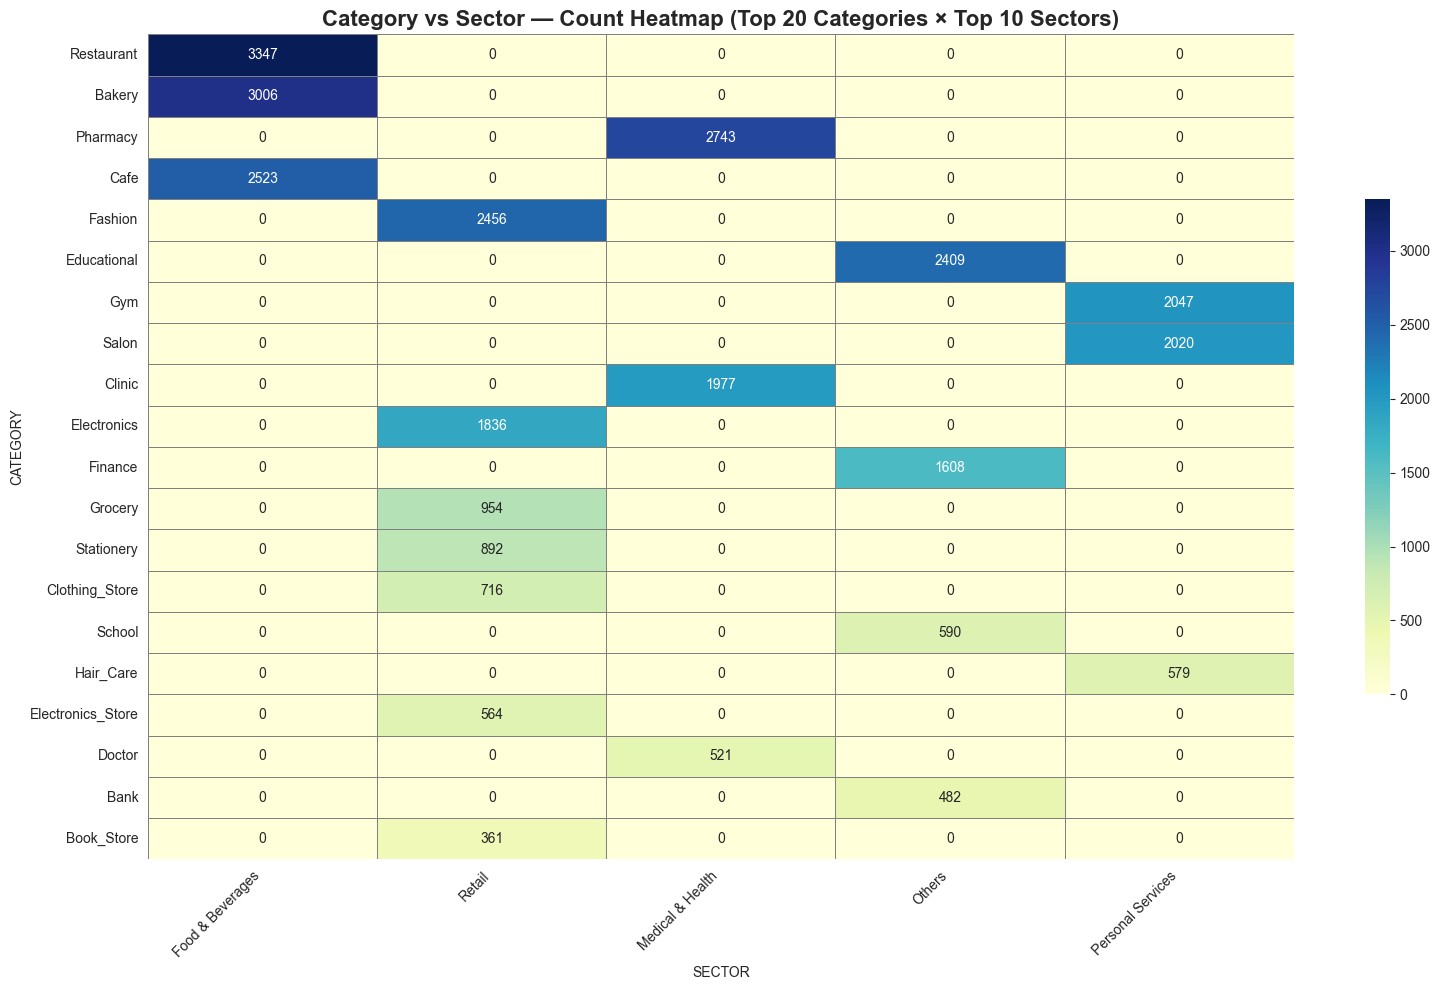

In [56]:
# Cell 9 - Category vs Sector heatmap (seaborn version with annotations)
pivot = pd.crosstab(df['CATEGORY'], df['SECTOR'])

# Top categories & sectors
top_categories = pivot.sum(axis=1).sort_values(ascending=False).head(20).index
top_sectors = pivot.sum(axis=0).sort_values(ascending=False).head(10).index

pivot_small = pivot.loc[top_categories, top_sectors]

plt.figure(figsize=(16, 10))

sns.heatmap(
    pivot_small,
    annot=True,               # SHOW ACTUAL VALUES
    fmt="d",                  # integer format
    cmap="YlGnBu",            # better professional color palette
    linewidths=0.4,
    linecolor='gray',
    cbar_kws={'shrink': 0.6}
)

plt.title("Category vs Sector — Count Heatmap (Top 20 Categories × Top 10 Sectors)", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(VIZ_DIR, "heatmap_cat_sector_real.png"), dpi=200)
plt.show()

# Save CSV
pivot_small.to_csv(os.path.join(OUT_DIR_BASE, "pivot_category_sector_top.csv"))


In [57]:
# Cell 11 - Top 20 highest-rated & lowest-rated businesses (CSV)
rated = df.dropna(subset=['RATING']).copy()
top_rated = rated.sort_values('RATING', ascending=False).head(20)
low_rated = rated.sort_values('RATING', ascending=True).head(20)
top_rated.to_csv(os.path.join(OUT_DIR_BASE, "top_rated_20.csv"), index=False)
low_rated.to_csv(os.path.join(OUT_DIR_BASE, "low_rated_20.csv"), index=False)

# also save sample_for_report.csv (up to 500 rows)
sample = df.sample(min(500, len(df)), random_state=42)
sample.to_csv(os.path.join(OUT_DIR_BASE, "sample_for_report.csv"), index=False)


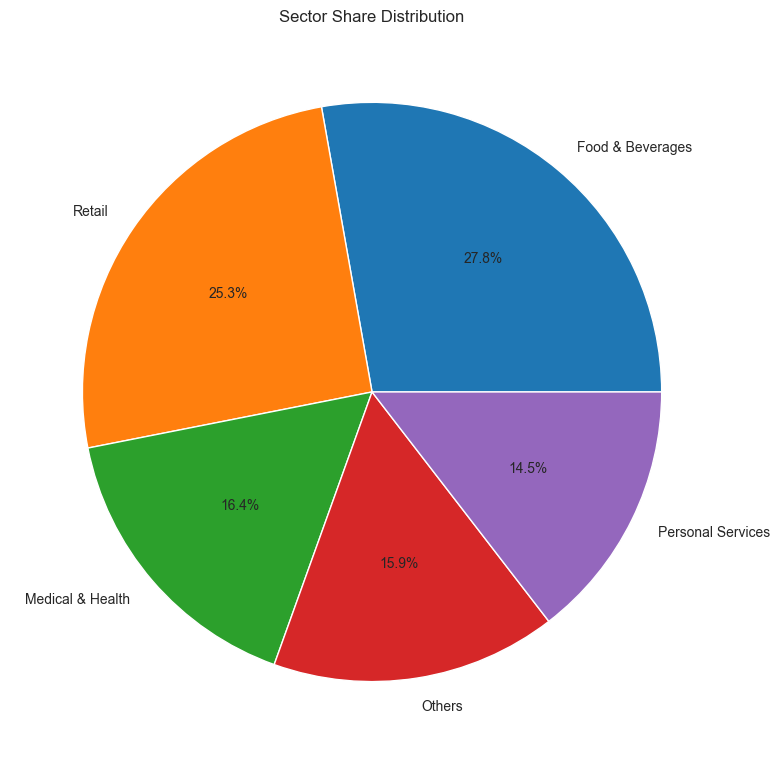

In [58]:
import os

# Create folder if not exists
ADD_DIR = "additional_charts"
os.makedirs(ADD_DIR, exist_ok=True)

# Sector share pie chart
sector_counts = df['SECTOR'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(sector_counts.values, labels=sector_counts.index, autopct='%1.1f%%')
plt.title("Sector Share Distribution")
plt.tight_layout()
plt.savefig(os.path.join(ADD_DIR, "sector_share_pie.png"), dpi=200)
plt.show()
